# Gender Recognition by Voice and Speech Analysis 

 This is a dataset originally created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics
import sklearn.model_selection

In [3]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [4]:
import os
dirpath="/content/drive/MyDrive/Colab Notebooks" #change this path as per your drive folders; both  py file and csv are kept in this path
os.chdir(dirpath)

dataframe = pd.read_csv("voice.csv")
dataframe.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In the above output, you can check the label given at the last column. It is either male or female.

In [5]:
dataframe.count()

meanfreq    3168
sd          3168
median      3168
Q25         3168
Q75         3168
IQR         3168
skew        3168
kurt        3168
sp.ent      3168
sfm         3168
mode        3168
centroid    3168
meanfun     3168
minfun      3168
maxfun      3168
meandom     3168
mindom      3168
maxdom      3168
dfrange     3168
modindx     3168
label       3168
dtype: int64

**Dataframe Properties**


The following acoustic properties of each voice are measured and included in the dataset:

**meanfreq:** mean frequency (in kHz)

**sd:** standard deviation of frequency

**median:** median frequency (in kHz)

**Q25: **first quantile (in kHz)

**Q75:** third quantile (in kHz)

**IQR:** interquantile range (in kHz)

**skew:** skewness (see note in specprop description)

**kurt:** kurtosis (see note in specprop description)

**sp.ent:** spectral entropy

**sfm:** spectral flatness

**mode:** mode frequency

**centroid:** frequency centroid (see specprop)

**peakf:** peak frequency (frequency with highest energy)

**meanfun:** average of fundamental frequency measured across acoustic signal

**minfun:** minimum fundamental frequency measured across acoustic signal

**maxfun:** maximum fundamental frequency measured across acoustic signal

**meandom:** average of dominant frequency measured across acoustic signal

**mindom:** minimum of dominant frequency measured across acoustic signal

**maxdom:** maximum of dominant frequency measured across acoustic signal

**dfrange:** range of dominant frequency measured across acoustic signal

**modindx:** modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range


label: male or female

In [6]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


Before we start training the model, we need to change the lable to numbers

In [8]:
dataframe.replace(to_replace="female", value=0, inplace=True)
dataframe.replace(to_replace="male", value=1, inplace=True)
dataframe.label.unique()

array([1, 0])

In [9]:
dataframe.head() #check the last column in the output to verify it has been converted to numbers

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


Shuffling the dataset

In [11]:
dataframe = dataframe.sample(frac=1).reset_index(drop=True)
dataframe.head() 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.221302,0.038197,0.227956,0.193103,0.247973,0.054870,2.519428,11.305892,0.868743,0.172811,...,0.221302,0.185145,0.019347,0.271186,0.643359,0.007812,4.984375,4.976562,0.150245,0
1,0.226452,0.031233,0.224910,0.213285,0.246643,0.033357,2.385628,8.707960,0.812386,0.153970,...,0.226452,0.196945,0.051227,0.279070,1.213199,0.023438,9.351562,9.328125,0.134143,0
2,0.190285,0.057151,0.207755,0.128571,0.237959,0.109388,1.335603,3.954167,0.899462,0.316783,...,0.190285,0.121535,0.050740,0.274286,0.978516,0.023438,5.273438,5.250000,0.108073,1
3,0.193112,0.034134,0.186331,0.172902,0.218225,0.045324,3.302238,19.117570,0.852324,0.208179,...,0.193112,0.164407,0.048780,0.274286,1.687500,0.023438,9.398438,9.375000,0.131516,0
4,0.161629,0.055171,0.165513,0.159295,0.188008,0.028713,7.137352,70.238014,0.871505,0.445676,...,0.161629,0.157125,0.011468,0.178571,0.211276,0.161133,0.668945,0.507812,0.170769,0


# **Splitting into training and validation set**

df_train - containing 2534 samples

df_val - containing 634 samples

In [12]:
df_train = dataframe.iloc[:2534,:]
df_val = dataframe.iloc[2534:,:]

In [13]:
X_train = df_train.iloc[:,:-1]
Y_train = df_train['label']

X_val = df_val.iloc[:,:-1]
Y_val = df_val['label']

In [14]:
print("Shape of X_train :" ,X_train.shape)
print("Shape of Y_train :" ,Y_train.shape)
print("Shape of X_val :" ,X_val.shape)
print("Shape of Y_val :" ,Y_val.shape)

Shape of X_train : (2534, 20)
Shape of Y_train : (2534,)
Shape of X_val : (634, 20)
Shape of Y_val : (634,)


**ML Model**

Train the model training set and then assess them on the basis of their scores on validation dataset.

In [16]:
lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier.fit(X_train, Y_train)
lr_val_accuracy = lr_classifier.score(X_val, Y_val)
print(f"Validation Accuracy of Logisitic Regression Classifier is: {(lr_val_accuracy )*100:.2f}%")

Validation Accuracy of Logisitic Regression Classifier is: 88.80%


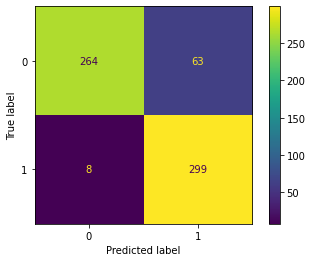

In [17]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(lr_classifier, X_val, Y_val)

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=3) # We always use odd numbers for this to avoid ties
knn_classifier.fit(X_train, Y_train)
knn_val_accuracy = knn_classifier.score(X_val, Y_val)
print(f"Validation Accuracy of KNN Clf. is: {(knn_val_accuracy)*100:.2f}%")

Validation Accuracy of KNN Clf. is: 72.71%


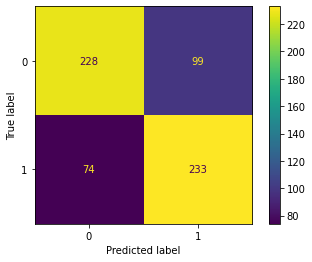

In [19]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(knn_classifier, X_val, Y_val)

In [20]:
svc_classifier = SVC(kernel = 'linear')
svc_classifier.fit(X_train, Y_train)
svc_val_accuracy = svc_classifier.score(X_val, Y_val)
print(f"Validation Accuracy of Support Vector Classifier is: {(svc_val_accuracy)*100:.2f}%")

Validation Accuracy of Support Vector Classifier is: 89.75%


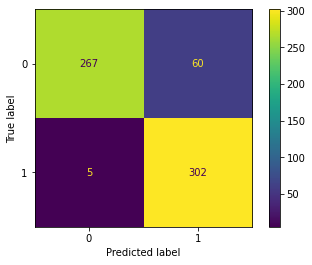

In [21]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(svc_classifier, X_val, Y_val)

In [22]:
print(f"Validation Accuracy of Logisitic Regression is: {(lr_val_accuracy )*100:.2f}%")
print(f"Validation Accuracy of SVC is: {(svc_val_accuracy )*100:.2f}%")
print(f"Validation Accuracy of KNN Clf. is: {(knn_val_accuracy)*100:.2f}%")

Validation Accuracy of Logisitic Regression is: 88.80%
Validation Accuracy of SVC is: 89.75%
Validation Accuracy of KNN Clf. is: 72.71%
